# <center> Module 1 

Group: <br>
Darko Petrov <br>
Alexander Lendon

### <center> Q1. Gaussian Models.

#### 1
a)

$$
- log L(\mu, \sigma^2, X) = \frac{n}{2} log (2\pi) + \frac{n}{2} log (\sigma^2) + \frac{1}{2 \sigma^2} \sum^n_{i=1}(X_i-\mu)^2
$$

b) 

To find the maximum likelihood we need to derivate with respect to $\mu$ and $\sigma$ as shown below 
for $\mu$ 
$$
\frac{d}{d\mu} - log L(\mu, \sigma, X) = \frac{1}{2 \sigma^2} \sum^n_{i=1}2(X_i-\mu)
$$

for $\sigma^2$
$$
\frac{d}{d\sigma} - log L(\mu, \sigma, X) = \frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^n_{i=1}(X_i-\mu)^2
$$

c) For a test in a class room $\mu$ is the mean result of the students. Two factors drive this variable, the difficulty of the test and the preparedness of the students. A more diffcult test a lower mean is suited. Similarly lower preparedness of students would also suit a lower mean value.

The variance of results is denoted by $\sigma$, this indicates the spread of the results. For a difficult test or student group with diverse abilities a larger variance would be suitable. A small sigma value would be suitable for easier test and with good student preparation or similar abilities.

#### 2

a)

$$
p(y_i | x_i, \theta) = \mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2)
$$

$$
L(\theta) = -\sum_{i=1}^N \log (p(y_n|x_n,\theta)) = -\sum_{i=1}^N  \log (\mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2))
$$

$$
 = - \sum_{i=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)
$$

$$
=-\sum^N_{i=1}\log \left(e^{-\frac{-y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)-\sum^N_{i=1}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


$$
=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


b)

Take the derivative of the negative log likelihood function with respect to $\sigma^2$. Setting the resulting expression to zero and solving for $\sigma^2$ gives the maximum likelihood estimate for $\sigma^2$.
$$
\frac{\partial{P}}{\partial{\sigma^2}} = -\frac{N}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2=0
$$
Rearrange for $\sigma^2$
$$
\frac{N}{2\sigma^2} = \frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$
$$
\sigma^2 = \frac{1}{N}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$

Similarly minimising the negative log likelihood function with resepect to $\hat\theta$,$\hat\mu$ gives the maximum likelihood estimate for $\hat\theta$ and $\hat\mu$. When minimising the expression for $\mathcal{L}(\theta,\mu,\sigma^2)$ the constant terms behave as a scaling factor and as such do not contribute to the optimisation of the location of minimum. Hence the resulting expression for this is:

$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2
$$

c) The L2 regularisation can be incorporated into the likelihood function as a gaussian prior defined as 

$$
p(\theta)=\mathcal{N}(\theta|0,\lambda−1) = \sqrt{\frac{\lambda}{2\pi}}e^{-\frac{\lambda}{2}||\theta||^2_2}
$$

Taking negative log of this expression
$$
-\log p(\theta)=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) -\log\left( e^{-\frac{\lambda}{2}||\theta||^2_2}\right)
$$
$$
=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
We can add this to the likelihood expression obtained previously
$$
L(\theta)=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) -\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
and minimising this expression with respect to $\theta$ $\mu$.
$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2 +{\lambda||\theta||^2_2}
$$
Again constants are ignored as part of the minimisation.

In [1]:
import pandas
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
# We will be using the sklearn library. You can learn more here:    
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# Loading the data
data0=pandas.read_csv('Real estate.csv')
npdata=data0.to_numpy()

# Divide the data to the variables and the label (price)
# The Ridge class does not admit an intercept (i.e. mu in the assignment) you should
# add a suitable column to your variables that will provide an extra parameter
# i.e. mu. Think what this column should be

# Now run ridge regression. Note that in the ridge classe mu is known as alpha.
#Setting alph=0 gives you the maximum likelihood solution. 
# You should try really large values of alpha to see the difference

# print(npdata)
X = npdata[:, :-1]  
y = npdata[:, -1]   
# X = np.column_stack((np.ones(X.shape[0]), X))
X = sm.add_constant(X)
# x = X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Run OLS regression
# Create and fit an OLS regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions on the test data
ols_predictions = ols_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for OLS
ols_mse = mean_squared_error(y_test, ols_predictions)
print(f"OLS Mean Squared Error: {ols_mse}")


alpha_values = np.logspace(-4,4, 10000)
alpha_values = np.insert(alpha_values, 0, 0.)
ridge_models = {}
ridge_mse = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_models[alpha] = ridge_model
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)



OLS Mean Squared Error: 54.60196067337739


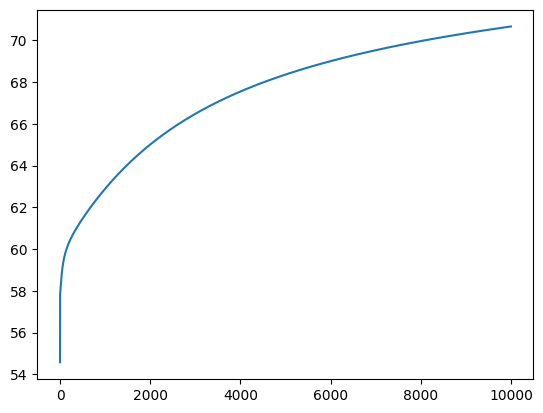

In [2]:
import matplotlib.pyplot as plt
# for a, b in zip(alpha_values, ridge_mse):
#     print("For Appha = ",a, "MSE=", b)
    
plt.plot(alpha_values,(ridge_mse))


d)

i)


ii)

iii)

iv)

v)

#### 3

a)
Gaussian distribution
$$
p(x_i | \mu, R) = \frac{1}{(2\pi)^{m/2} |R|^{1/2}} \exp\left(-\frac{1}{2} (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$

Likelihood function is a product of all theeses distributions 

$$
p(\{x_i\} | R, µ) = Π p(x_i | µ, R)
$$
$$
p(\{x_i\} | R, \mu) = \frac{1}{(2\pi)^{mn/2} |R|^{n/2}} \exp\left(-\frac{1}{2} \sum_{i=1}^n (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$



b) 
$$
p(R) ∝ e^{-λ * Tr[R^{-1}]} = e^{-λ * Tr[S]}
$$

$$
argmax_{µ, R} [p({xi} | µ, R) * p(R)]
$$


Take the log of proior
$$
log(p(R)) = -λ * Tr(S)
$$


$$
log(p({x_i} | µ, R)) = Σ [-0.5 * (x_i - µ)^T * R^(-1) * (x_i - µ)]
$$

$$
\frac{∂}{∂R} [log(p(R)) + log(p({x_i} | µ, R))] = 0
$$

TODO: do the above calculation


$$
\frac{∂}{∂µ} [Σ log(p(xi | µ, R)) + log(p(R))] = 0
$$

TODO: Do this derivation too


$$
R^ = [ (1/n) Σ (x_i - µ) * (x_i - µ)^T + λI ]^{-1}
$$

#### 4





117


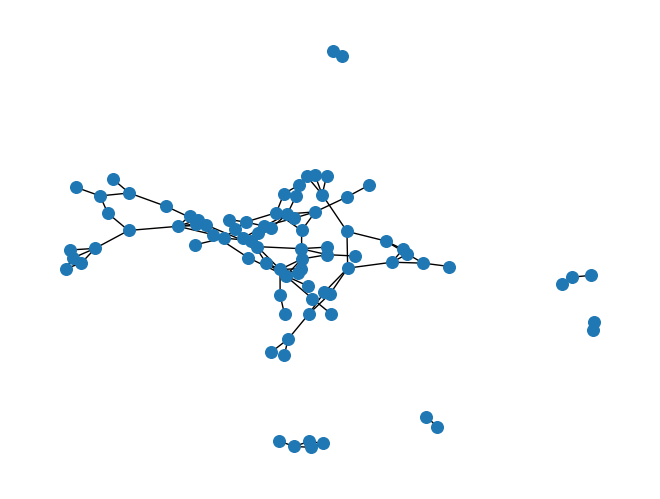

In [67]:
# option a)
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Read the tsv file and convert to numpy:
data=pandas.read_csv('TCGA-BRCA.tsv',sep='\t')
npdata=data.to_numpy()
data_clean=npdata[1:,2:].astype('float')



selected_genes = data_clean[:, :100]
# gene_variances = np.var(data_clean, axis=0)
# selected_gene_indices = np.argsort(gene_variances)[-100:]
# selected_genes = data_clean[:, selected_gene_indices]



sample_covariance_matrix = np.cov(selected_genes, rowvar=False)
sample_precision_matrix = np.linalg.inv(sample_covariance_matrix)

# Create Graph
graph = nx.Graph()
t = 0.008
c = 0
# Iterate through elements of the precision matrix and add edges if the element is larger than 't'
n, _ = sample_precision_matrix.shape
for i in range(n):
    for j in range(i + 1, n):
        if abs(sample_precision_matrix[i, j]) > t:
            graph.add_edge(i, j)
            c += 1
print(c)


# Add edges to the graph by your precision matrix
# Use command graph.add_edge():
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html

# draw your graph:
nx.draw(graph, with_labels=False, node_size=70)
plt.show()


692.8211135295787
100


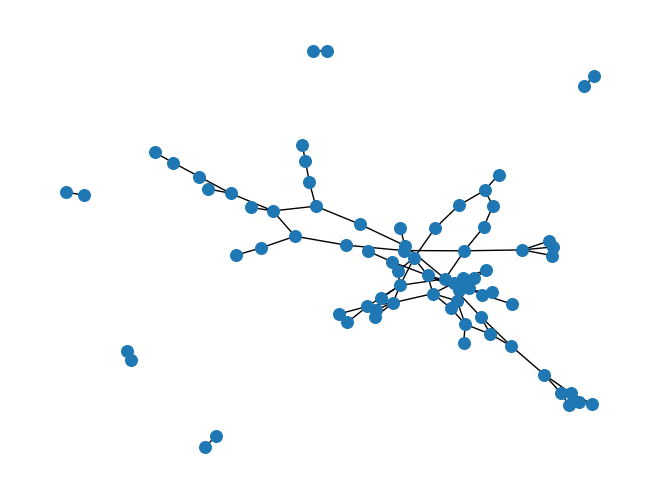

In [68]:
# Option b)
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Read the tsv file and convert to numpy:
data=pandas.read_csv('TCGA-BRCA.tsv',sep='\t')
npdata=data.to_numpy()
data_clean=npdata[1:,2:].astype('float')



# selected_genes = data_clean[:, :100]
gene_variances = np.var(data_clean, axis=0)
selected_gene_indices = np.argsort(gene_variances)[-100:]
selected_genes = data_clean[:, selected_gene_indices]

lam = 0.1
I = np.trace(selected_genes)
print(I)
sample_covariance_matrix = np.cov(selected_genes, rowvar=False)
sample_precision_matrix = np.linalg.inv(sample_covariance_matrix)

# Create Graph
graph = nx.Graph()
t = 0.008
c = 0
# Iterate through elements of the precision matrix and add edges if the element is larger than 't'
n, _ = sample_precision_matrix.shape
for i in range(n):
    for j in range(i + 1 , n):
        if abs(sample_precision_matrix[i, j]) > t:
            graph.add_edge(i, j)
            c += 1

print(c)

# Add edges to the graph by your precision matrix
# Use command graph.add_edge():
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html

# draw your graph:
nx.draw(graph, with_labels=False, node_size=70)
plt.show()


a)

b) an estimation guess where the absolute value of only around 100 cases will be bigger that the thresshold

c)

d)

e)

### <center> Q2. Logistic Regression

#### 1



#### 2

a)



b)



c)



### <center> Q3

#### 1

#### 2

a)



b)